# Iris Dataset: k-Means Clustering

Let's use k-means clustering to try and identify species in, as usual, the iris dataset.  

[Here](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py) is another example from the documentation which uses the same dataset.

In [32]:
import pandas as pd
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics as sm
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [33]:
iris = datasets.load_iris()

In [34]:
X = pd.DataFrame(iris.data)
X.columns = ['sepal_L','sepal_W','petal_L','petal_W']
 
y = pd.DataFrame(iris.target)
y.columns = ['species']

In [35]:
colors = np.array(['red', 'blue', 'green'])

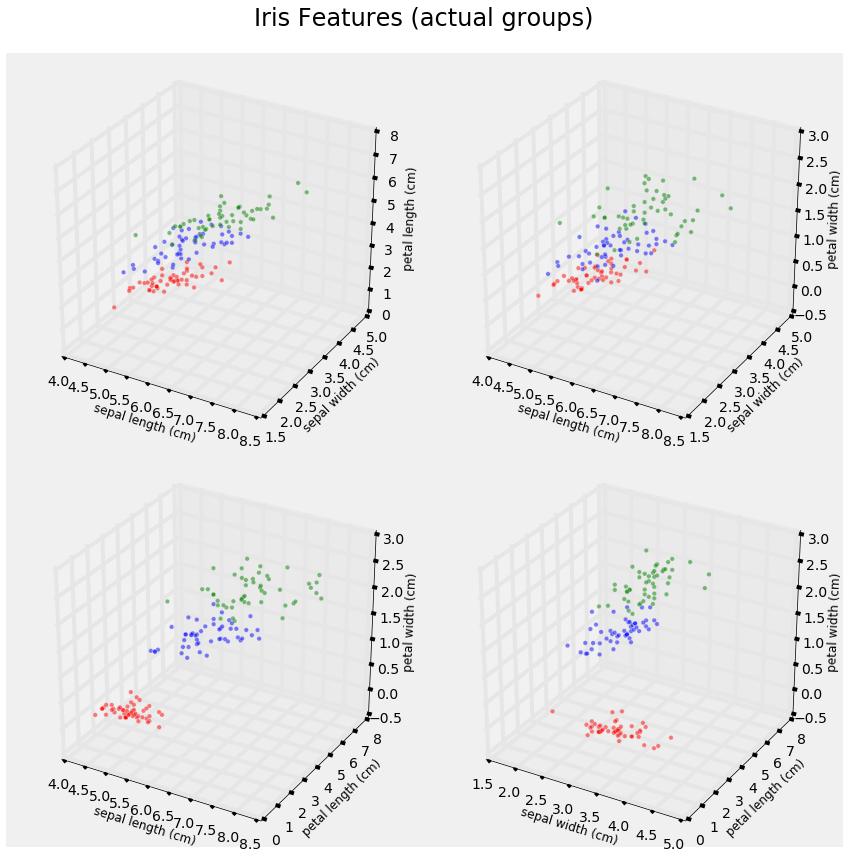

In [36]:
fig = plt.figure(figsize = (12,12))
plt.style.use('fivethirtyeight')
plt.title('Iris Features (actual groups)', fontsize = 24, y = 1.03)
plt.xticks(())
plt.yticks(())

X1 = X['sepal_L']
X1n = 'sepal length (cm)'
X2 = X['sepal_W']
X2n = 'sepal width (cm)'
X3 = X['petal_L']
X3n = 'petal length (cm)'
X4 = X['petal_W']
X4n = 'petal width (cm)'

## PLOT FIRST COMBO OF THREE FEATURES

ax1 = fig.add_subplot(2, 2, 1, projection='3d')

ax1.scatter(X1, X2, X3, c = colors[y['species']], alpha = 0.5, s = 20)
ax1.set_xlabel(X1n, fontsize = 12)
ax1.set_ylabel(X2n, fontsize = 12)
ax1.set_zlabel(X3n, fontsize = 12)

## PLOT SECOND COMBO OF THREE FEATURES

ax2 = fig.add_subplot(2, 2, 2, projection='3d')

ax2.scatter(X1, X2, X4, c = colors[y['species']], alpha = 0.5, s = 20)
ax2.set_xlabel(X1n, fontsize = 12)
ax2.set_ylabel(X2n, fontsize = 12)
ax2.set_zlabel(X4n, fontsize = 12)


## PLOT THIRD COMBO OF THREE FEATURES

ax3 = fig.add_subplot(2, 2, 3, projection='3d')

ax3.scatter(X1, X3, X4, c = colors[y['species']], alpha = 0.5, s = 20)
ax3.set_xlabel(X1n, fontsize = 12)
ax3.set_ylabel(X3n, fontsize = 12)
ax3.set_zlabel(X4n, fontsize = 12)


## PLOT FOURTH COMBO OF THREE FEATURES

ax4 = fig.add_subplot(2, 2, 4, projection='3d')

ax4.scatter(X2, X3, X4, c = colors[y['species']], alpha = 0.5, s = 20)
ax4.set_xlabel(X2n, fontsize = 12)
ax4.set_ylabel(X3n, fontsize = 12)
ax4.set_zlabel(X4n, fontsize = 12)

plt.tight_layout()

plt.show()

Let's do K-means clustering on the iris dataset!  We know we'd like to see three clusters in the end because there are three species, but remember that a lot of the time we won't know information like that in advance.

In [37]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
model.cluster_centers_
## these are the black dots on the 3D plots below

array([[ 6.85      ,  3.07368421,  5.74210526,  2.07105263],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097]])

As we see below, since the species predictions made by the clustering model are unsupervised, the labels assigned to each group to not necessarily match the actual labels; we will keep the assigned groupings but switch the names to match the real ones.  

Predicted labels:

In [40]:
ypred = model.labels_
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

The real labels:

In [41]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
## Use list comprehension to switch 0's and 1's if we have to:
#ypred = np.array([0 if x == 1 else 1 if x == 0 else 2 for x in model.labels_])

In [31]:
ypred 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
sm.accuracy_score(y, ypred)

0.093333333333333338

In [92]:
cm = confusion_matrix(y, ypred)

In [113]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Setosa (R)', 'Versicolor (B)', 'Virginica (G)']):
    
    plt.figure(figsize=(12,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True label', fontsize = 18)
    plt.xlabel('Predicted label', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])
    return

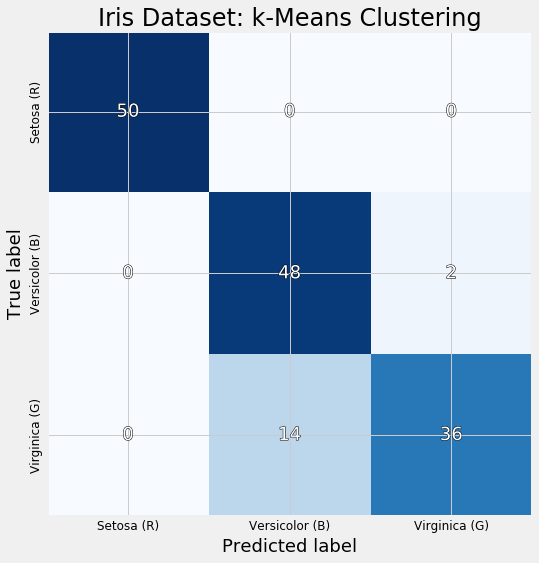

In [114]:
plot_confusion_matrix(cm, title='Iris Dataset: k-Means Clustering')

In [102]:
## change data type of predictions so we can color points according to predicted species this time
ypred_df = pd.DataFrame(ypred, columns = ['predicted'])  

In [117]:
centers = pd.DataFrame(model.cluster_centers_, columns = ['x1', 'x2', 'x3', 'x4'])
centers

,x1,x2,x3,x4
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


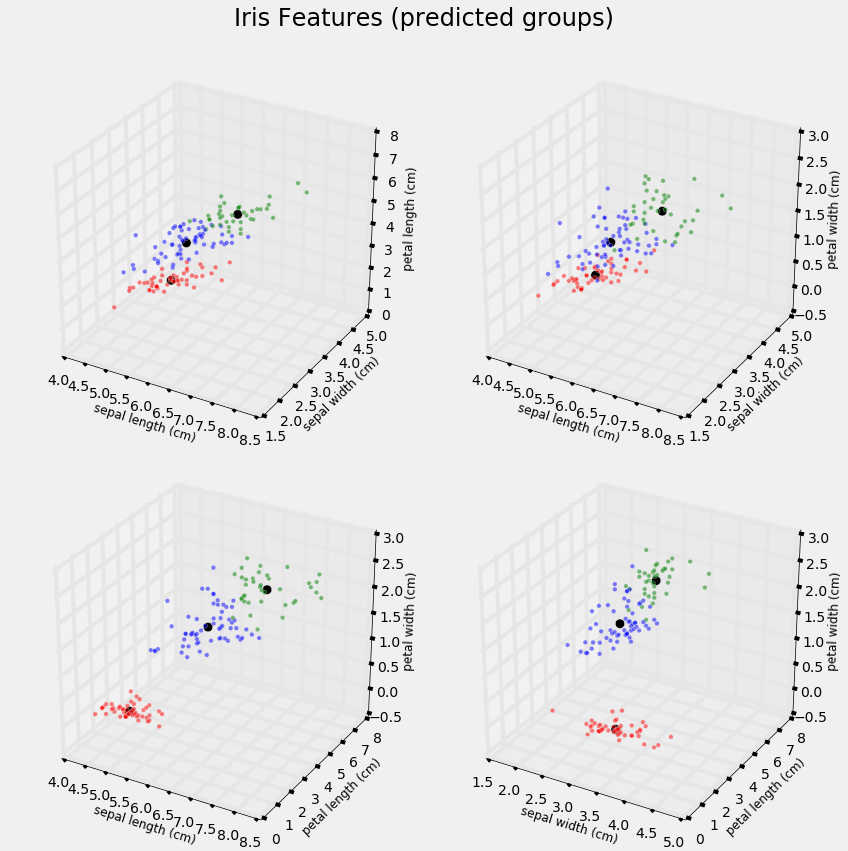

In [123]:
fig = plt.figure(figsize = (12,12))
plt.style.use('fivethirtyeight')
plt.title('Iris Features (predicted groups)', fontsize = 24, y = 1.03)
plt.xticks(())
plt.yticks(())

X1 = X['sepal_L']
X1n = 'sepal length (cm)'
X2 = X['sepal_W']
X2n = 'sepal width (cm)'
X3 = X['petal_L']
X3n = 'petal length (cm)'
X4 = X['petal_W']
X4n = 'petal width (cm)'

## PLOT FIRST COMBO OF THREE FEATURES

ax1 = fig.add_subplot(2, 2, 1, projection='3d')

ax1.scatter(X1, X2, X3, c = colors[ypred_df['predicted']], alpha = 0.5, s = 20)
ax1.scatter(centers['x1'], centers['x2'], centers['x3'], c = 'black', alpha = 1, s = 90)
ax1.set_xlabel(X1n, fontsize = 12)
ax1.set_ylabel(X2n, fontsize = 12)
ax1.set_zlabel(X3n, fontsize = 12)

## PLOT SECOND COMBO OF THREE FEATURES

ax2 = fig.add_subplot(2, 2, 2, projection='3d')

ax2.scatter(X1, X2, X4, c = colors[ypred_df['predicted']], alpha = 0.5, s = 20)
ax2.scatter(centers['x1'], centers['x2'], centers['x4'], c = 'black', alpha = 1, s = 90)
ax2.set_xlabel(X1n, fontsize = 12)
ax2.set_ylabel(X2n, fontsize = 12)
ax2.set_zlabel(X4n, fontsize = 12)


## PLOT THIRD COMBO OF THREE FEATURES

ax3 = fig.add_subplot(2, 2, 3, projection='3d')

ax3.scatter(X1, X3, X4, c = colors[ypred_df['predicted']], alpha = 0.5, s = 20)
ax3.scatter(centers['x1'], centers['x3'], centers['x4'], c = 'black', alpha = 1, s = 90)
ax3.set_xlabel(X1n, fontsize = 12)
ax3.set_ylabel(X3n, fontsize = 12)
ax3.set_zlabel(X4n, fontsize = 12)


## PLOT FOURTH COMBO OF THREE FEATURES

ax4 = fig.add_subplot(2, 2, 4, projection='3d')

ax4.scatter(X2, X3, X4, c = colors[ypred_df['predicted']], alpha = 0.5, s = 20)
ax4.scatter(centers['x2'], centers['x3'], centers['x4'], c = 'black', alpha = 1, s = 90)
ax4.set_xlabel(X2n, fontsize = 12)
ax4.set_ylabel(X3n, fontsize = 12)
ax4.set_zlabel(X4n, fontsize = 12)

plt.tight_layout()

plt.show()

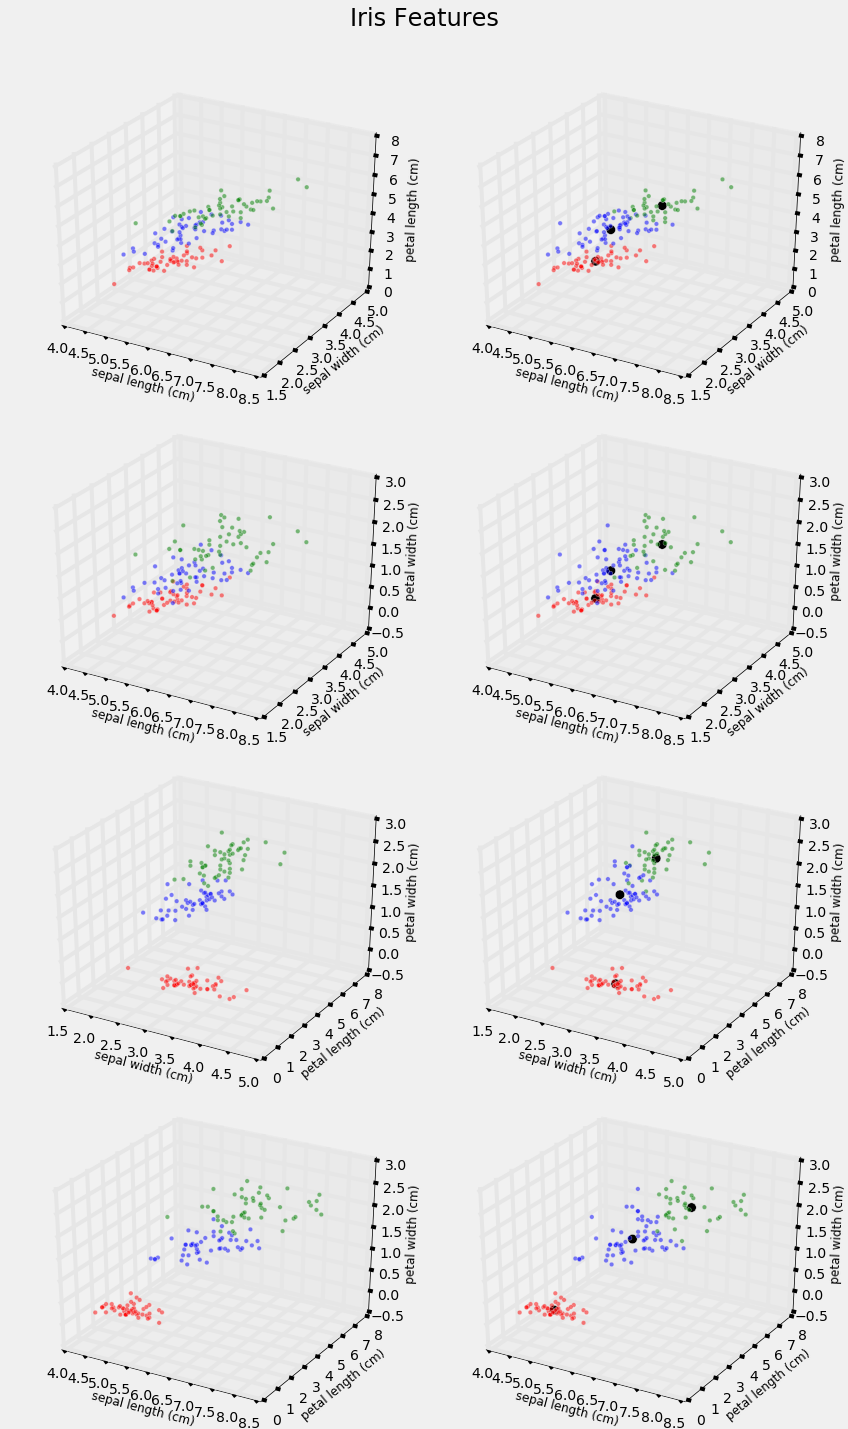

In [135]:
fig = plt.figure(figsize = (12,20))
plt.style.use('fivethirtyeight')
plt.title('Iris Features', fontsize = 24, y = 1.03)
plt.xticks(())
plt.yticks(())

X1 = X['sepal_L']
X1n = 'sepal length (cm)'
X2 = X['sepal_W']
X2n = 'sepal width (cm)'
X3 = X['petal_L']
X3n = 'petal length (cm)'
X4 = X['petal_W']
X4n = 'petal width (cm)'

## PLOT FIRST COMBO OF THREE FEATURES ACTUAL

ax1 = fig.add_subplot(4, 2, 1, projection='3d')

ax1.scatter(X1, X2, X3, c = colors[y['species']], alpha = 0.5, s = 20)
ax1.set_xlabel(X1n, fontsize = 12)
ax1.set_ylabel(X2n, fontsize = 12)
ax1.set_zlabel(X3n, fontsize = 12)

## PLOT FIRST COMBO OF THREE FEATURES PREDICTED

ax1 = fig.add_subplot(4, 2, 2, projection='3d')

ax1.scatter(X1, X2, X3, c = colors[ypred_df['predicted']], alpha = 0.5, s = 20)
ax1.scatter(centers['x1'], centers['x2'], centers['x3'], c = 'black', alpha = 1, s = 90)
ax1.set_xlabel(X1n, fontsize = 12)
ax1.set_ylabel(X2n, fontsize = 12)
ax1.set_zlabel(X3n, fontsize = 12)

## PLOT SECOND COMBO OF THREE FEATURES ACTUAL

ax1 = fig.add_subplot(4, 2, 3, projection='3d')

ax1.scatter(X1, X2, X4, c = colors[y['species']], alpha = 0.5, s = 20)
ax1.set_xlabel(X1n, fontsize = 12)
ax1.set_ylabel(X2n, fontsize = 12)
ax1.set_zlabel(X4n, fontsize = 12)

## PLOT SECOND COMBO OF THREE FEATURES PREDICTED

ax1 = fig.add_subplot(4, 2, 4, projection='3d')

ax1.scatter(X1, X2, X4, c = colors[ypred_df['predicted']], alpha = 0.5, s = 20)
ax1.scatter(centers['x1'], centers['x2'], centers['x4'], c = 'black', alpha = 1, s = 90)
ax1.set_xlabel(X1n, fontsize = 12)
ax1.set_ylabel(X2n, fontsize = 12)
ax1.set_zlabel(X4n, fontsize = 12)

## PLOT THIRD COMBO OF THREE FEATURES ACTUAL

ax1 = fig.add_subplot(4, 2, 5, projection='3d')

ax1.scatter(X2, X3, X4, c = colors[y['species']], alpha = 0.5, s = 20)
ax1.set_xlabel(X2n, fontsize = 12)
ax1.set_ylabel(X3n, fontsize = 12)
ax1.set_zlabel(X4n, fontsize = 12)

## PLOT THIRD COMBO OF THREE FEATURES PREDICTED

ax1 = fig.add_subplot(4, 2, 6, projection='3d')

ax1.scatter(X2, X3, X4, c = colors[ypred_df['predicted']], alpha = 0.5, s = 20)
ax1.scatter(centers['x2'], centers['x3'], centers['x4'], c = 'black', alpha = 1, s = 90)
ax1.set_xlabel(X2n, fontsize = 12)
ax1.set_ylabel(X3n, fontsize = 12)
ax1.set_zlabel(X4n, fontsize = 12)

## PLOT FOURTH COMBO OF THREE FEATURES ACTUAL

ax1 = fig.add_subplot(4, 2, 7, projection='3d')

ax1.scatter(X1, X3, X4, c = colors[y['species']], alpha = 0.5, s = 20)
ax1.set_xlabel(X1n, fontsize = 12)
ax1.set_ylabel(X3n, fontsize = 12)
ax1.set_zlabel(X4n, fontsize = 12)

## PLOT FOURTH COMBO OF THREE FEATURES PREDICTED

ax1 = fig.add_subplot(4, 2, 8, projection='3d')

ax1.scatter(X1, X3, X4, c = colors[ypred_df['predicted']], alpha = 0.5, s = 20)
ax1.scatter(centers['x1'], centers['x3'], centers['x4'], c = 'black', alpha = 1, s = 90)
ax1.set_xlabel(X1n, fontsize = 12)
ax1.set_ylabel(X3n, fontsize = 12)
ax1.set_zlabel(X4n, fontsize = 12)

plt.tight_layout()

plt.show()